In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [ ]:
df=pd.read_csv('mental_health_workplace_survey.csv')

In [ ]:
df.drop(columns=['EmployeeID'], inplace=True)

In [ ]:
salary_order = {
    'Below 30k': 0,
    '30k-50k': 1,
    '50k-70k': 2,
    '70k-100k': 3,
    'Above 100k': 4
}
df['SalaryRange'] = df['SalaryRange'].map(salary_order)


In [ ]:
one_hot_cols = ['Gender', 'RemoteWork', 'Department', 'JobRole',
                'HasMentalHealthSupport', 'HasTherapyAccess', 'Country']

df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Country,object
JobRole,object
Department,object
YearsAtCompany,int64
WorkHoursPerWeek,int64
RemoteWork,object
BurnoutLevel,float64
JobSatisfaction,float64


In [ ]:
exclude = ['Gender', 'Country','JobRole','Department','RemoteWork','HasMentalHealthSupport','HasTherapyAccess']
numerical_cols = [col for col in df.columns if col not in exclude]
print(numerical_cols)


['Age', 'YearsAtCompany', 'WorkHoursPerWeek', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'ManagerSupportScore', 'MentalHealthDaysOff', 'SalaryRange', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
print(df[numerical_cols])

           Age  YearsAtCompany  WorkHoursPerWeek  BurnoutLevel  \
0     0.835099        0.646445          0.293989     -0.831171   
1    -0.436487       -1.508004          1.707398      0.730817   
2    -1.072280        0.480718          1.707398      0.618137   
3     0.108478        0.812172         -1.590556     -0.516442   
4    -0.073177       -0.679370         -1.237204      1.076631   
...        ...             ...               ...           ...   
2995 -1.163108        1.309353          0.176205     -1.029333   
2996 -1.526418        0.646445         -1.590556     -1.196412   
2997 -1.708073       -1.673731         -0.766068      0.528769   
2998  1.470892       -1.342277         -0.412715     -0.734032   
2999  0.471789        1.143626          0.411773      1.655576   

      JobSatisfaction  StressLevel  ProductivityScore  SleepHours  \
0           -0.145528     1.519164          -0.521468    0.319776   
1           -1.325175     0.051725          -0.682562    0.458507   


In [ ]:
# normalization  for numerical features completed

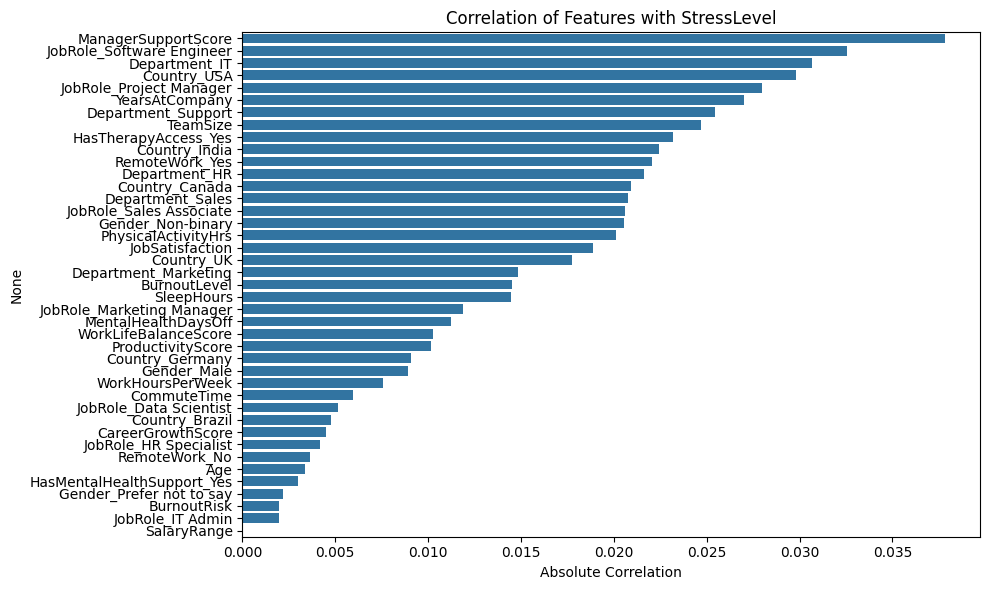

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df_encoded.corr()['StressLevel'].drop('StressLevel')
correlation_sorted = correlation.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, orient='h')
plt.title('Correlation of Features with StressLevel')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

In [ ]:
selected_features = correlation_sorted.head(15).index.tolist()
X_selected = df_encoded[selected_features]

In [ ]:
print(X_selected)

      ManagerSupportScore  JobRole_Software Engineer  Department_IT  \
0               -0.882776                      False          False   
1               -0.401445                       True           True   
2               -0.697945                      False           True   
3               -0.362939                      False           True   
4                0.025976                      False          False   
...                   ...                        ...            ...   
2995             0.588171                      False          False   
2996             0.052931                      False          False   
2997            -0.628633                      False          False   
2998             1.647099                      False          False   
2999             1.065651                       True           True   

      Country_USA  JobRole_Project Manager  YearsAtCompany  \
0           False                    False        0.646445   
1           False      

In [ ]:
df['WorkBurnout'] = df['WorkHoursPerWeek'] * df['BurnoutLevel']
df['SleepBalance'] = df['SleepHours'] * df['WorkLifeBalanceScore']

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df_encoded.drop(columns=['StressLevel', 'SalaryRange'])
y = df_encoded['StressLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train['SalaryRange'] = imputer.fit_transform(X_train[['SalaryRange']])
X_test['SalaryRange'] = imputer.transform(X_test[['SalaryRange']])

lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
models = {'Linear Regression': lr, 'Ridge Regression': ridge, 'Lasso Regression': lasso}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  MSE = {mse:.2f}\n  R² = {r2:.2f}\n")


Linear Regression:
  MSE = 1.02
  R² = -0.04

Ridge Regression:
  MSE = 1.02
  R² = -0.04

Lasso Regression:
  MSE = 0.98
  R² = -0.00

